In [156]:
import pandas as pd
import numpy as np
import sklearn

In [157]:
titanic_data = pd.read_csv('titanic-age-filled.csv')
titanic_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,1.0,0.0,3.0,male,22.0,1.0,0.0
1,1,2.0,1.0,1.0,female,38.0,1.0,0.0
2,2,3.0,1.0,3.0,female,26.0,0.0,0.0
3,3,4.0,1.0,1.0,female,35.0,1.0,0.0
4,4,5.0,0.0,3.0,male,35.0,0.0,0.0


Looks like one column is unnamed, we will drop it.

In [158]:
data_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic_data = pd.DataFrame(titanic_data[data_cols])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3.0,male,22.0,1.0,0.0
1,1.0,1.0,female,38.0,1.0,0.0
2,1.0,3.0,female,26.0,0.0,0.0
3,1.0,1.0,female,35.0,1.0,0.0
4,0.0,3.0,male,35.0,0.0,0.0


In [159]:
titanic_data['Pclass'].dtype

dtype('float64')

Pclass, SibSp, Parch should eventually be converted into categorical variables.
Now, try to build a decision tree on variable types not converted to categorical.

In [160]:
titanic_data.Pclass = pd.Categorical(titanic_data.Pclass)
titanic_data.SibSp = pd.Categorical(titanic_data.SibSp)
titanic_data.Parch = pd.Categorical(titanic_data.Parch)
titanic_data.Sex = pd.Categorical(titanic_data.Sex)

[titanic_data['Pclass'].dtype,titanic_data['Sex'].dtype, titanic_data['SibSp'].dtype ,titanic_data['Parch'].dtype]

[CategoricalDtype(categories=[1.0, 2.0, 3.0, 21.75], ordered=False),
 CategoricalDtype(categories=['21.75', 'female', 'male'], ordered=False),
 CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 21.75], ordered=False),
 CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 21.75], ordered=False)]

Looks like the data cleaning is not downright enough. Need to re-clean the data
Below are the code to deal with outlier 21.75 existing in multiple columns

In [161]:
titanic_data = pd.read_csv('titanic dataset/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
# Fill in missing values in age data
null_rows = np.where([titanic_data.Age.isnull()])[1] # Get rows with missing ages
filled_rows = list(set(titanic_data.index )- set(null_rows))
len(filled_rows), len(null_rows)

## Get the average ages by gender by classes
titanic_data_NoNull = titanic_data.loc[filled_rows]
avg_age_by_sex_class = titanic_data_NoNull.groupby(['Sex', 'Pclass']).Age.mean()
avg_age_by_sex_class = round(avg_age_by_sex_class, 0)
avg_age_by_sex_class

## Automatically estimate passenger age given class and gender
def estAge(df, row_indx):
    passenger = df.loc[row_indx]
    passenger_class = passenger.Pclass
    passenger_sex = passenger.Sex
    titanic_data.loc[row_indx, 'Age'] = avg_age_by_sex_class.loc[
        (passenger_sex, passenger_class)] # Mutate the record directly
    # print("Finish filling")


## Fill out missing ages by class-gender age averages
for indx in null_rows:
    estAge(titanic_data, indx)

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.382907,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.260272,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3 Discoveries are worth noting:
* Categorical variables like Survived, SibSp, Parch, Pclass are float values, they should be converted to categories
* The maximum fare is 512, far greater than the upper quantile 31. Distribution of fare should be inspected to judge whether the outliers are due to record error.
* Some people paid 0 fare to get on the ship, should that be a truth or error?

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Fare', ylabel='Count'>

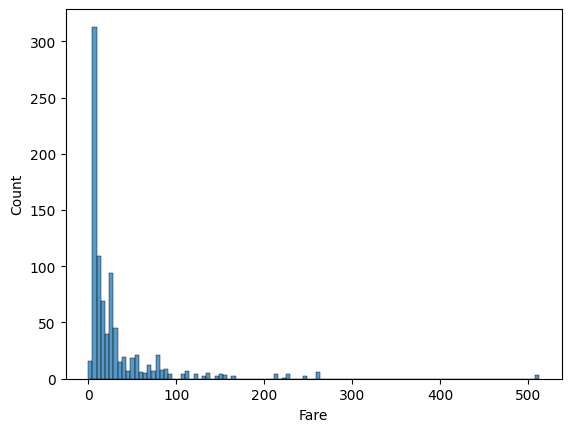

In [165]:
sns.histplot(titanic_data.Fare)

The plot is right skewed. We don't have enough evidence to drop the fare of over 500 bucks because the super expensive ticket might be in the sample by chance. 

In [166]:
# Reformat columns
# titanic_data.Age = titanic_data.Age.round(2)
titanic_data.Pclass.astype(int)
titanic_data.SibSp.astype(int)
titanic_data.Parch.astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int32

In [167]:
titanic_data.Age
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conversion to integer finishes. 

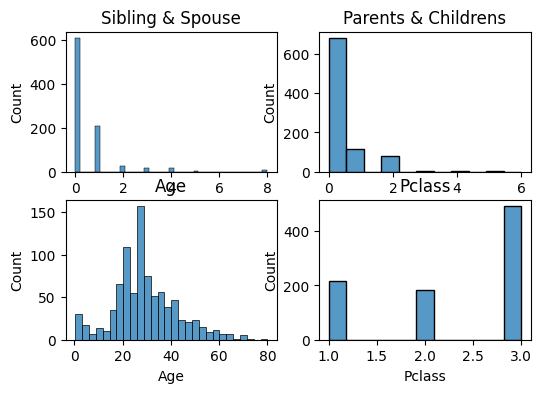

In [168]:
fig, ax = plt.subplots(2,2, figsize=(6, 4))
sns.histplot(titanic_data.SibSp, ax=ax[0,0], kde=False, legend=False)
ax[0,0].set_title("Sibling & Spouse")
sns.histplot(titanic_data.Parch, ax=ax[0,1], kde=False, legend=False)
ax[0,1].set_title("Parents & Childrens")
sns.histplot(titanic_data.Age, ax=ax[1,0], kde=False, legend=False)
ax[1,0].set_title("Age")
sns.histplot(titanic_data.Pclass, ax=ax[1,1], kde=False, legend=False)
ax[1,1].set_title("Pclass")
plt.show()

We can partition the sample by:
* Siblings: no sibling (N), one sibling (S), more sibling (M)
* Parents & children: no (N), one (S), more (M)
* Age groups: 0-14 years (Children), 15-24 years (Youth), 25-64 (Adult), 65 + (Senior), according to Statistic Canada age group classification

In [169]:
from email.policy import default

def AgeGroup_Classifier(Age):
    if Age <= 14:
        return 'Children'
    elif Age <= 24:
        return 'Youth'
    elif Age <= 64:
        return 'Adult'
    else:
        return 'Senior'

    # AgeGroups = ['Children', 'Youth', 'Adult', 'Senior']
    # AgeBreakPoints = [14, 24, 64]
    

    # lessThan = Age <= AgeBreakPoints
    # AgeGroupIndx = np.where(lessThan)[0][0]
    
    # try:
    #     AgeGroupName =  AgeGroups[AgeGroupIndx]
    # except IndexError as e:
    #     return 'Senior'
    # return AgeGroupName

    # switcher_SibSp = {0: 'N', 1:'S'}
    # row['SibSp_group'] = switcher_SibSp.get(row.SibSp, 'M')
    # row['Parch_group'] = switcher_SibSp.get(row.Parch, 'M')

# titanic_data.apply(AgeSibPar_Classifier)

titanic_data['AgeGroup'] = titanic_data.Age.map(AgeGroup_Classifier, na_action='ignore')

switcher = {0: 'N', 1:'S'}
titanic_data['SibSp_group'] = titanic_data.SibSp.map(lambda sib: switcher.get(sib, 'M'))
titanic_data['Parch_group'] = titanic_data.SibSp.map(lambda sib: switcher.get(sib, 'M'))

In [170]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSp_group,Parch_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,S,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,N,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,N,N


In [172]:
to_categorical_variables = ['Pclass', 'Parch', 'SibSp', 'AgeGroup', 'SibSp_group', 'Parch_group']
for var in to_categorical_variables:
    titanic_data[var] = pd.Categorical(titanic_data[var])

titanic_data['AgeGroup'].dtype

CategoricalDtype(categories=['Adult', 'Children', 'Senior', 'Youth'], ordered=False)

Conversion to categories finishes.

Let's inpsect distrubution of SibSp and Parch.

In [173]:
titanic_data.to_csv('titanic-2nd-clean.csv')